**Palmer Penguins Blog Post**

**Abstract** 
In this blog posts, I delve into some of the factors that we can use to predict species in the palmer penguins dataset. I used SelectKBest and going through all combinations to select my columns that I'd use to try to predict species. Although both SelectKBest and combinations method got similar levels of accuracy, they selected slightly different columns. Finally, I visualize my model to showcase how future data predictions would look.


##Importing Palmer Penguins Data Set

In [2]:
import pandas as pd
import numpy as np
train_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)
train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0809,31,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N63A1,Yes,11/24/08,40.9,16.6,187.0,3200.0,FEMALE,9.08458,-24.54903,NaN
1,PAL0809,41,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N74A1,Yes,11/24/08,49.0,19.5,210.0,3950.0,MALE,9.53262,-24.66867,NaN
2,PAL0708,4,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N32A2,Yes,11/27/07,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,NaN
3,PAL0708,15,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,Yes,12/3/07,45.8,14.6,210.0,4200.0,FEMALE,7.79958,-25.62618,NaN
4,PAL0809,34,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N65A2,Yes,11/24/08,51.0,18.8,203.0,4100.0,MALE,9.23196,-24.17282,NaN


Here I am prepareing the data by dropping columns that don't makes sense to train on or are constant for the data set. I also convert columns like Island into boolean columns using pandas getDummies. 

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = df.drop(["Stage"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)
X_train.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,40.9,16.6,187.0,3200.0,9.08458,-24.54903,False,True,False,False,True,True,False
1,49.0,19.5,210.0,3950.0,9.53262,-24.66867,False,True,False,False,True,False,True
2,50.0,15.2,218.0,5700.0,8.25540,-25.40075,True,False,False,False,True,False,True
3,45.8,14.6,210.0,4200.0,7.79958,-25.62618,True,False,False,False,True,True,False
4,51.0,18.8,203.0,4100.0,9.23196,-24.17282,False,True,False,False,True,False,True


Here we can see what the new data looks like

In [4]:
X_train.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,40.9,16.6,187.0,3200.0,9.08458,-24.54903,False,True,False,False,True,True,False
1,49.0,19.5,210.0,3950.0,9.53262,-24.66867,False,True,False,False,True,False,True
2,50.0,15.2,218.0,5700.0,8.25540,-25.40075,True,False,False,False,True,False,True
3,45.8,14.6,210.0,4200.0,7.79958,-25.62618,True,False,False,False,True,True,False
4,51.0,18.8,203.0,4100.0,9.23196,-24.17282,False,True,False,False,True,False,True


This plot looks at the qualitative column "Island" and visualizes it to see if there would possibly be any trends that could be helpful. From the plot, we see that Chinstrap penguins are exclusively found on Dream, while Gentoo penguins are exclusively found on Biscoe Island.

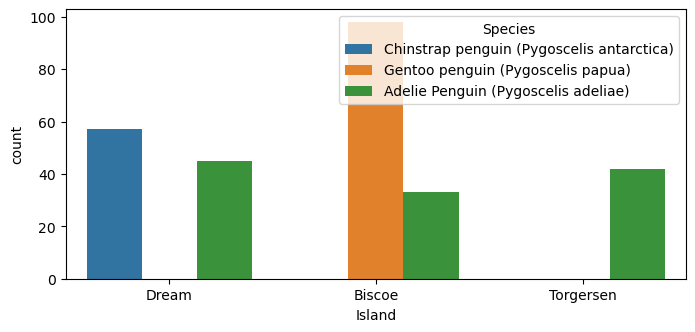

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, figsize = (8, 3.5))

plot = sns.countplot(train, x = "Island", hue = "Species")

My second graph visualizes Culment Length vs Flipper Length to see if there's a correlation between the two and species. We see that Adelie penguins tend to have small culmen lengths and flippper lengths. Gentoo penguins, on the other hand, tend to have medium to large culmen lengths and long flipper lengths. Lastly, Chinstrap penguins tend to have long culmen lengths and medium to small flipper lengths. 

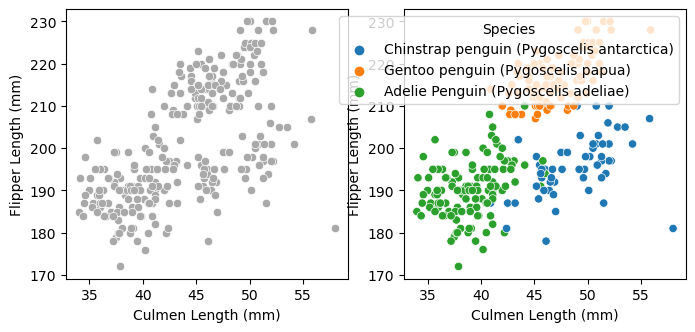

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (8, 3.5))

p1 = sns.scatterplot(train, x = "Culmen Length (mm)", y = "Flipper Length (mm)", ax = ax[0], color = "darkgrey")
p2 = sns.scatterplot(train, x = "Culmen Length (mm)", y = "Flipper Length (mm)", hue = "Species", ax = ax[1])

To select my features I try two different methods: SelectKBest and trying all possible combinations. Below we see my Select K Best implementation. 

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2

def select_K_best(X, y, score_func, k):
    selector = SelectKBest(score_func, k=k)
    selector.fit(X, y)
    return selector.get_feature_names_out()


X_quant_selected = select_K_best(X_train[["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]], y_train, f_classif, 2)

X_qual_selected = select_K_best(X_train[["Island_Biscoe", "Island_Dream", "Island_Torgersen", "Clutch Completion_No", "Clutch Completion_Yes", "Sex_FEMALE", "Sex_MALE"]], y_train, chi2, 1)


In [6]:
X_quant_selected

array(['Culmen Length (mm)', 'Flipper Length (mm)'], dtype=object)

In [7]:
X_qual_selected = [col for col in X_train.columns if X_qual_selected[0][0:4] in col]
X_qual_selected

['Island_Biscoe', 'Island_Dream', 'Island_Torgersen']

Here we see all the rows selected in through SelectKBest

In [8]:
selectK_cols = X_quant_selected.tolist() + X_qual_selected
selectK_cols


['Culmen Length (mm)',
 'Flipper Length (mm)',
 'Island_Biscoe',
 'Island_Dream',
 'Island_Torgersen']

I also implemented running through all combinations and calculating accuracy based on a random forrest algorithm. This method is significantly more time consuming than select k best but should return the most optimal columns.

In [61]:
from itertools import combinations
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=10, random_state=20)

# these are not actually all the columns: you'll 
# need to add any of the other ones you want to search for
all_qual_cols = ["Island", "Clutch Completion", "Sex"]
all_quant_cols = ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]

mean_score = 0
comb_cols = []
for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = qual_cols + list(pair) 
    clf.fit(X_train[cols], y_train)
    score = cross_val_score(clf, X_train[cols], y_train, cv=5)
    if score.mean() > mean_score:
      mean_score = score.mean()
      comb_cols = cols
comb_cols = comb_cols[3:5] + comb_cols[0:3]
comb_cols


['Culmen Length (mm)',
 'Culmen Depth (mm)',
 'Island_Biscoe',
 'Island_Dream',
 'Island_Torgersen']

To determine which algorithm to use, I test both possibility using cross val scores. 

In [62]:
select_clf = RandomForestClassifier(n_estimators=40, random_state=40, max_depth=5)
select_clf.fit(X_train[selectK_cols], y_train)
select_score_clf = cross_val_score(select_clf, X_train[selectK_cols], y_train, cv=5)
select_score_clf.mean()

0.9804675716440423

In [63]:
comb_clf = RandomForestClassifier(n_estimators=40, random_state=40, max_depth=5)

In [64]:
comb_clf.fit(X_train[comb_cols], y_train)
comb_score_clf = cross_val_score(comb_clf, X_train[comb_cols], y_train, cv=5)
comb_score_clf.mean()

0.9804675716440423

While the scores were similar, I decided to use the comb_clf.

In [72]:
test_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)

X_test, y_test = prepare_data(test)
comb_clf.score(X_test[comb_cols], y_test)

1.0

Yay! As we can see we achieved a score of 100%.

In [66]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.patches import Patch

def plot_regions(model, X, y):
    
    x0 = X[X.columns[0]]
    x1 = X[X.columns[1]]
    qual_features = X.columns[2:]
    
    fig, axarr = plt.subplots(1, len(qual_features), figsize = (7, 3))

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    XX = xx.ravel()
    YY = yy.ravel()

    for i in range(len(qual_features)):
      XY = pd.DataFrame({
          X.columns[0] : XX,
          X.columns[1] : YY
      })

      for j in qual_features:
        XY[j] = 0

      XY[qual_features[i]] = 1

      p = model.predict(XY)
      p = p.reshape(xx.shape)
      
      
      # use contour plot to visualize the predictions
      axarr[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
      
      ix = X[qual_features[i]] == 1
      # plot the data
      axarr[i].scatter(x0[ix], x1[ix], c = y[ix], cmap = "jet", vmin = 0, vmax = 2)
      
      axarr[i].set(xlabel = X.columns[0], 
            ylabel  = X.columns[1], 
            title = qual_features[i])
      
      patches = []
      for color, spec in zip(["red", "green", "blue"], ["Adelie", "Chinstrap", "Gentoo"]):
        patches.append(Patch(color = color, label = spec))

      plt.legend(title = "Species", handles = patches, loc = "best")
      
      plt.tight_layout()

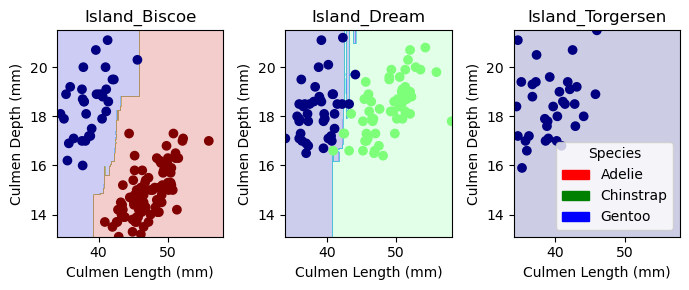

In [67]:
plot_regions(comb_clf, X_train[comb_cols], y_train)

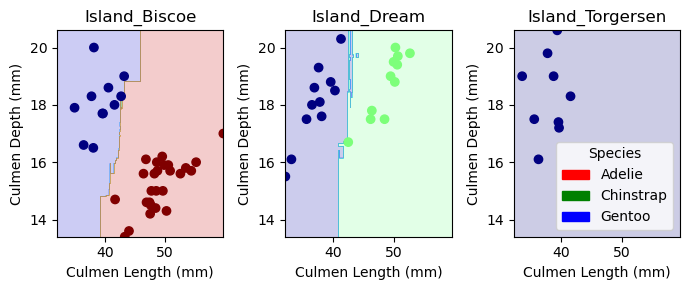

In [68]:
plot_regions(comb_clf, X_test[comb_cols], y_test)

Since the result has 100% accuracy, the confusion matrix won't show much for the test set. 

In [74]:
from sklearn.metrics import confusion_matrix

y_test_pred = comb_clf.predict(X_test[comb_cols])
C = confusion_matrix(y_test, y_test_pred)
C

array([[31,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 26]])

#Discussion
I managed to achieve 100% accuracy for the test data! I found it interesting that the combination method and selectKBest selected different features, however there are a couple reasons I could think of why. First one is that selectKBest doesn't take into account how features might interact with eachother. For example, two features may predict on part of the data really well while another feature may predict a different part slightly less well. The best algorithm would use both to train but selectKBest seems like it would only choose the two that help predict the same part of the data because they overall correlate better. I wonder how you can eliminate this weakness on datasets where you can't go through every combination. 
Even with the combination features, from the visualizations we see that the model created isn't perfect. The graph shows a couple slim lines that perfectly allow some data points to get correctly labeled which shows some weakness in the model. With a larger test dataset, I'm sure this overfitting wouldn't hold for all data points in that area. 
In the future, I would love to try different models to see if and how they might come up with varying degrees of accuracy.